TD 1-2 : Rappels sur Numpy, Matplotlib et Seaborn
=============

Le but de ce TD est de vous rappeler les choses que vous avez vu au premier semestre et de l’utiliser sur un vrai jeu de données. Nous allons réutiliser numpy, pandas, matplotlib, seaborn.

In [1]:
import numpy as np

Mis en pratique
===============

Créer une fonction "create_and_add1" pour qu'elle prenne en entrée une liste, créé un array à partir de celle liste et ajoute 1 à tous les éléments.

In [2]:
def create_and_add1(l):
    a = np.array(l)
    return a + 1

In [3]:
# Test
assert np.all(np.equal(create_and_add1([1,2,3]), np.array([2,3,4])))
assert np.all(np.equal(create_and_add1([i for i in range(10)]),np.arange(1,11)))
print("okay")

okay


Écrire une fonction "num_elem_and_dim" qui renvoie le nombre d'élements et la dimension de l'array

In [4]:
def num_elem_and_dim(array):
    return array.size, array.ndim

In [5]:
a = np.zeros(4)
b = np.arange(100).reshape((5,5,2,2))

assert np.all(np.equal(num_elem_and_dim(a),(4,1)))
assert np.all(np.equal(num_elem_and_dim(b),(100,4)))
print("okay")

okay


Fonction "max_min_moy" qui renvoie le maximum, le minimum et la moyenne d'un vecteur ou d'une matrice

In [6]:
def max_min_moy(array):
    return array.max(), array.min(), array.mean()

In [7]:
a = np.arange(20)
b = np.arange(160).reshape((20,8)) + 2

assert np.all(np.equal(max_min_moy(a), (19,0,9.5) ))
assert np.all(np.equal(max_min_moy(b), (161,2,81.5)))
print("okay")

okay


Fonction suppr_three qui transforme la 3e colonne en zeros

In [8]:
def suppr_three(array):
    array[:,2] = 0
    return array

In [9]:
a = np.arange(160).reshape((20,8)) + 2
b = np.arange(160).reshape((20,8)) + 4

assert suppr_three(a).sum() == 11440
assert suppr_three(b).sum() == 11720
print("Ça continue")

Ça continue


Fonction "swap_ten_and_last" qui échange la ligne dont l'index vaut 10 (11e ligne) avec la dernière ligne (doit marcher pour un vecteur et une matrice)

In [10]:
def swap_ten_and_last(array):
    array[[-1,10]] = array[[10,-1]]
    return array

In [11]:
# Pas de assert mais vérifiez le résultat!

a = np.arange(50)
b = np.arange(100).reshape((20,5))

print(swap_ten_and_last(a))
print(swap_ten_and_last(b))

[ 0  1  2  3  4  5  6  7  8  9 49 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 10]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]
 [95 96 97 98 99]
 [55 56 57 58 59]
 [60 61 62 63 64]
 [65 66 67 68 69]
 [70 71 72 73 74]
 [75 76 77 78 79]
 [80 81 82 83 84]
 [85 86 87 88 89]
 [90 91 92 93 94]
 [50 51 52 53 54]]


Fonction "create_random_plus_2" qui créé une matrice de nombres aléatoires (taille donnée en entrée) puis que l'on multiplie par deux

In [12]:
#Fonction "create_random_plus_2" qui créé une matrice de nombres aléatoires (taille donnée en entrée) puis que l'on multiplie par deux -> print(create_random_plus_2(5,5))

def create_random_plus_2(n,m):
    return np.random.rand(n,m)*2

In [13]:
# Pas de assert, mais vérifiez quand même!
print(create_random_plus_2(5,5))
print(create_random_plus_2(100,20))

[[0.4601781  0.56091711 1.38508524 1.76833861 1.69718051]
 [0.76861545 0.28661636 0.4300703  0.47994861 0.83087805]
 [0.48552992 1.20680542 1.85885471 0.48358728 1.80845406]
 [1.55977144 1.17406533 1.64370228 1.03215597 0.76714889]
 [0.21271844 0.14745355 1.22769233 0.61928858 0.56321523]]
[[0.47935554 0.03806612 1.78196521 ... 1.80094929 0.18839771 1.32097698]
 [1.54141485 1.90798765 1.78130388 ... 0.95345733 0.86766583 1.66165706]
 [1.07170745 1.86944117 1.55108666 ... 1.41540525 1.39657678 1.55791171]
 ...
 [0.84936499 0.10348377 0.06329155 ... 0.39711292 1.00817612 1.83954837]
 [0.58563394 1.52940488 1.66363963 ... 1.51423212 1.04332426 1.45928118]
 [1.15179421 1.26671822 1.09341243 ... 0.76127948 1.95581665 0.81442198]]


Fonction "center_data" qui centre les données (pour chaque élément dans chaque colonne, on lui soustrait la moyenne de sa colonne)

In [14]:
def center_data(array):
    return array - array.mean(axis=0)

In [15]:
data = np.arange(100).reshape(5,20)
data2 = np.arange(100).reshape(20,5)


assert np.all(np.equal(center_data(data).mean(axis=0), 0))
assert np.all(np.equal(center_data(data2).mean(axis=0), 0))
print("C'est ok")

C'est ok


## Pandas

Le but de cette partie de TD est de récupérer des informations sur les États Américains et jouer un peu avec ces données.
L’idée est de vous montrer quelques étapes de traitement classique avec Pandas.

Si vous vous souvenez de vos cours de Bases de Données, cela devrait aider. Sinon, ça n’est pas un pré-requis.

Vous allez voir que pour récupérer la densité pour chaque état par décennie par exemple, le nombre d’étapes est assez conséquent.  
Mais lorsque vous aurez plus l’habitude, ces étapes seront bien plus évidentes pour vous.

In [16]:
import pandas as pd
import numpy as np

Charger le jeu de données data/state-abbrevs.csv  
Utilisez la fonction : **pandas.read_csv** : https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Que se passe t’il si vous laissez les paramètres de read_csv par défault ?  
Faites attention à bien changer le séparateur pour que le fichier soit bien chargé.

Affichez ensuite les 6 derniers états par ordre alphabétique.

In [17]:
df_abbrevs = pd.read_csv("data/state-abbrevs.csv", sep=";")
df_abbrevs[:6]

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO


Charger les deux autres jeux de données sur les USA (population, areas)

In [18]:
df_population = pd.read_csv("data/state-population.csv", sep=",")
df_areas = pd.read_csv("data/state-areas.csv", sep=",")

Rassembler le nom de l’état et sa population avec **pandas.merge** : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html  
Attention à bien préciser left_on et right_on

Que se passe t’il si vous utilisez l’option 'how="outer"' et 'how="inner"' ?  
(Indice : regardez les 'state/region', que constatez-vous ?)

Pour la suite, on utilisera 'outer'

In [19]:
df_merged = pd.merge(df_abbrevs, df_population, left_on="abbreviation", right_on="state/region")

Affichez le nom complet de tous les états (chaque état ne doit apparaître qu’une seule fois)  
Utilisez la fonction DataFrame.unique()

In [20]:
df_merged['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

Supprimer l’abréviation (qui doit apparaître deux fois à cause du merge, l’autre étant dans 'state/region')

In [21]:
df_merged.drop('abbreviation', axis=1)

,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2443,Wyoming,WY,under18,1993,137458.0
2444,Wyoming,WY,total,1991,459260.0
2445,Wyoming,WY,under18,1991,136720.0
2446,Wyoming,WY,under18,1990,136078.0


Combien d’états n’ont pas leur population d’indiquée ? 
Utilisez la fonction DataFrame.isnull

In [22]:
null_population = df_merged['population'].isnull().sum()
null_population

0

On constate que PR et USA n’existent que sous forme d’abréviation, rajouter dans le tableau "Puerto Rico" et "United States" dans la colonne "state"

In [23]:
new_rows = pd.DataFrame({
    'abbreviation': ['PR', 'USA'],
    'state': ['Puerto Rico', 'United States']
})

# Concatenate the new rows to the existing DataFrame
df_abbrevs = pd.concat([df_abbrevs, new_rows], ignore_index=True)
print(df_abbrevs.tail())

df_merged = pd.merge(df_abbrevs, df_population, left_on="abbreviation", right_on="state/region")
df_merged.drop('abbreviation', axis=1)

            state abbreviation
48  West Virginia           WV
49      Wisconsin           WI
50        Wyoming           WY
51    Puerto Rico           PR
52  United States          USA


,state,state/region,ages,year,population
0,Alabama,AL,under18,2012,1117489.0
1,Alabama,AL,total,2012,4817528.0
2,Alabama,AL,under18,2010,1130966.0
3,Alabama,AL,total,2010,4785570.0
4,Alabama,AL,under18,2011,1125763.0
...,...,...,...,...,...
2539,United States,USA,total,2010,309326295.0
2540,United States,USA,under18,2011,73902222.0
2541,United States,USA,total,2011,311582564.0
2542,United States,USA,under18,2012,73708179.0


Rajouter la superficie "area (sq. mi)" qui se trouve dans le csv state-areas.csv

In [24]:
df_merged = pd.merge(df_merged, df_areas, left_on='state', right_on='state', how='left')
df_merged.drop('abbreviation', axis=1)
df_merged.head()

,state,abbreviation,state/region,ages,year,population,area (sq. mi)
0,Alabama,AL,AL,under18,2012,1117489.0,52423.0
1,Alabama,AL,AL,total,2012,4817528.0,52423.0
2,Alabama,AL,AL,under18,2010,1130966.0,52423.0
3,Alabama,AL,AL,total,2010,4785570.0,52423.0
4,Alabama,AL,AL,under18,2011,1125763.0,52423.0


Calculer la densite par état (va se faire pour tous les âges et toutes les années normalement)

In [25]:
df_merged['densite'] = df_merged['population'] / df_merged['area (sq. mi)']
df_merged.head()

,state,abbreviation,state/region,ages,year,population,area (sq. mi),densite
0,Alabama,AL,AL,under18,2012,1117489.0,52423.0,21.316769
1,Alabama,AL,AL,total,2012,4817528.0,52423.0,91.897221
2,Alabama,AL,AL,under18,2010,1130966.0,52423.0,21.573851
3,Alabama,AL,AL,total,2010,4785570.0,52423.0,91.287603
4,Alabama,AL,AL,under18,2011,1125763.0,52423.0,21.474601


Quel est l’état le moins peuplé en 2010, tous âges confondus ? Quel est l’état avec la densité la plus importante (toujours en 2010, tous âges confondus) ?  
(Attention aux valeurs manquantes !)

In [26]:
df_2010 = df_merged[(df_merged['year'] == 2010) & (df_merged['ages'] == 'total')]
df_2010 = df_2010.dropna(subset=['population', 'area (sq. mi)'])
least_populated_state = df_2010.loc[df_2010['population'].idxmin()]
least_populated_state

state             Wyoming
abbreviation           WY
state/region           WY
ages                total
year                 2010
population       564222.0
area (sq. mi)     97818.0
densite          5.768079
Name: 2405, dtype: object

## Pandas Group, Matplotlib et Seaborn

On va passer sur un autre jeu de données pour refaire un peu de pandas et des groupby et ensuite faire des affichages avec Matplotlib et Seaborn

In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("colorblind") # On pense aux gens qui sont daltoniens !

current_colors = sns.palettes.color_palette()

Ouvrir les données Tallo.csv

In [28]:
df = pd.read_csv("data/Tallo.csv",sep=",")

Afficher le résumé des diverses stats à l’aide de la fonction describe()

In [29]:
df.describe()

,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m,reference_id
count,498838.000000,498838.000000,498838.000000,497335.000000,312829.000000,498838.000000
mean,19.698823,21.959141,20.325298,12.337553,2.151126,37.107698
std,25.165503,82.313046,19.316761,8.769326,1.549920,18.660853
min,-51.560000,-155.324000,1.000000,1.300000,0.050000,1.000000
25%,3.360000,-52.352000,9.000000,6.000000,1.050000,29.000000
50%,20.055000,9.065000,15.000000,10.000000,1.750000,35.000000
75%,40.550000,109.065000,26.000000,16.400000,2.750000,55.000000
max,69.880000,177.030000,770.000000,115.800000,24.250000,69.000000


Affichez le nombre de families, genus, species unique dans la table

In [30]:
df['family'].value_counts()
df['genus'].value_counts()
df['species'].value_counts()

species
Quercus ilex               22760
Pinus sylvestris           18221
Pinus halepensis           14003
Pinus pinaster             11766
Quercus infectoria         10964
                           ...  
Lithocarpus orocola            1
Decaspermum parviflorum        1
Terminalia foetidissima        1
Syzygium fastigiatum           1
Tarenna mollis                 1
Name: count, Length: 5163, dtype: int64

Groupez les arbres par famille et calculez la hauteur (height_m) moyenne par famille.
Quelle est la famille la plus grande ?

In [31]:
mean_height_by_family = df['height_m'].groupby(df['family']).mean()
mean_height_by_family

family
Acanthaceae        11.108350
Achariaceae        13.644479
Achatocarpaceae     3.654545
Actinidiaceae       7.336066
Adoxaceae           4.417241
                     ...    
Vitaceae            9.007895
Vochysiaceae       14.061579
Winteraceae         9.392473
Zamiaceae           4.800000
Zygophyllaceae      4.605970
Name: height_m, Length: 187, dtype: float64

Affichez les arbres ayant leur rayon de couronne 'crown_radius_m' le plus petit  
Affichez le plus grand, avec son rayon.

Rayon de la couronne (moyen):  
La distance horizontal (moyenne), du tronc jusqu’au bout des feuilles.
https://www.researchgate.net/figure/Measurement-of-crown-depth-A-and-crown-radius-B-image-adapted-from-Pretzsch-et-al_fig1_343524931 

In [32]:
# Trouver l'arbre avec le plus petit rayon de couronne
min_crown_radius_tree = df.loc[df['crown_radius_m'].idxmin()]

# Trouver l'arbre avec le plus grand rayon de couronne
max_crown_radius_tree = df.loc[df['crown_radius_m'].idxmax()]

# Calculer le rayon de couronne moyen
mean_crown_radius = df['crown_radius_m'].mean()

min_crown_radius_tree
max_crown_radius_tree
mean_crown_radius

2.1511255350367136

Affichez un histogramme affichant la hauteur des arbres (height_m).
Jouez avec le nombre de bins pour changer la précision du graphique

(Vous pouvez Utilisez plt.hist et sns.histplot)

Quelle est la hauteur la plus courant ? (Utilisez ce que renvoie plt.hist, avec 100 bins)

(array([9.89730e+04, 1.19715e+05, 9.06770e+04, 6.59990e+04, 4.42680e+04,
        2.91050e+04, 1.87320e+04, 1.15250e+04, 7.98500e+03, 4.33900e+03,
        2.27400e+03, 1.35100e+03, 7.91000e+02, 4.63000e+02, 3.21000e+02,
        2.38000e+02, 1.95000e+02, 1.02000e+02, 8.20000e+01, 4.50000e+01,
        3.30000e+01, 3.70000e+01, 4.00000e+01, 2.40000e+01, 8.00000e+00,
        4.00000e+00, 3.00000e+00, 0.00000e+00, 3.00000e+00, 3.00000e+00]),
 array([  1.3       ,   5.11666667,   8.93333333,  12.75      ,
         16.56666667,  20.38333333,  24.2       ,  28.01666667,
         31.83333333,  35.65      ,  39.46666667,  43.28333333,
         47.1       ,  50.91666667,  54.73333333,  58.55      ,
         62.36666667,  66.18333333,  70.        ,  73.81666667,
         77.63333333,  81.45      ,  85.26666667,  89.08333333,
         92.9       ,  96.71666667, 100.53333333, 104.35      ,
        108.16666667, 111.98333333, 115.8       ]),
 <BarContainer object of 30 artists>)

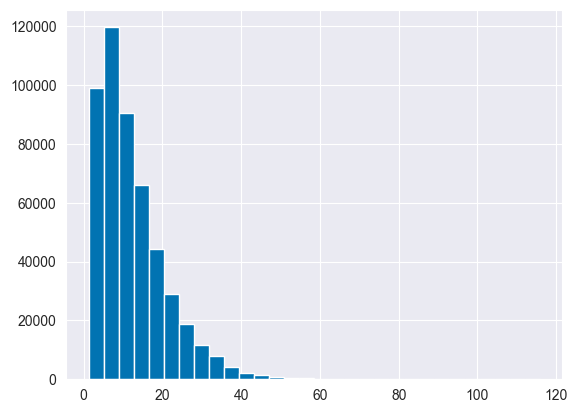

In [33]:
plt.hist(df['height_m'], bins=30)

(array([2.1453e+04, 5.2691e+04, 6.4489e+04, 4.9429e+04, 4.5911e+04,
        4.5142e+04, 3.0250e+04, 3.1252e+04, 2.9512e+04, 1.9329e+04,
        1.9441e+04, 1.4548e+04, 1.4036e+04, 1.0899e+04, 8.4410e+03,
        7.7770e+03, 6.5230e+03, 5.0290e+03, 4.4310e+03, 3.6920e+03,
        2.7040e+03, 2.2890e+03, 1.6110e+03, 1.3190e+03, 9.0100e+02,
        6.8600e+02, 6.4200e+02, 5.1600e+02, 3.8100e+02, 3.1200e+02,
        2.9000e+02, 1.8500e+02, 1.4700e+02, 1.3600e+02, 1.2400e+02,
        1.1700e+02, 9.3000e+01, 9.6000e+01, 7.8000e+01, 7.2000e+01,
        4.6000e+01, 3.3000e+01, 3.8000e+01, 3.4000e+01, 2.5000e+01,
        1.9000e+01, 1.8000e+01, 1.5000e+01, 1.1000e+01, 1.2000e+01,
        6.0000e+00, 2.9000e+01, 2.1000e+01, 1.1000e+01, 1.3000e+01,
        9.0000e+00, 3.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1.3       ,   2.93571429,   4.571428

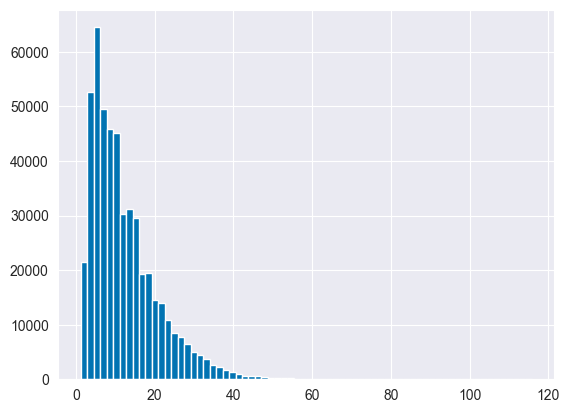

In [34]:
plt.hist(df['height_m'], bins=70)

Afficher dans deux plots côte à côte :
- Un histogramme affichant les arbres dont le diamètre du tronc (stem_diameter_cm) est inférieur à 100 cm
- Un histogramme affichant les arbres dont le diamètre du tronc (stem_diameter_cm) est supérieur à 100 cm

(array([51764., 46519., 63313., 73429., 52651., 37323., 32421., 26202.,
        20720., 15680., 13647., 10424.,  9324.,  8931.,  6705.,  5048.,
         4307.,  3209.,  2478.,  2176.,  1778.,  1524.,  1228.,  1050.,
          939.,   857.,   715.,   584.,   527.,   414.]),
 array([ 1.        ,  4.29666667,  7.59333333, 10.89      , 14.18666667,
        17.48333333, 20.78      , 24.07666667, 27.37333333, 30.67      ,
        33.96666667, 37.26333333, 40.56      , 43.85666667, 47.15333333,
        50.45      , 53.74666667, 57.04333333, 60.34      , 63.63666667,
        66.93333333, 70.23      , 73.52666667, 76.82333333, 80.12      ,
        83.41666667, 86.71333333, 90.01      , 93.30666667, 96.60333333,
        99.9       ]),
 <BarContainer object of 30 artists>)

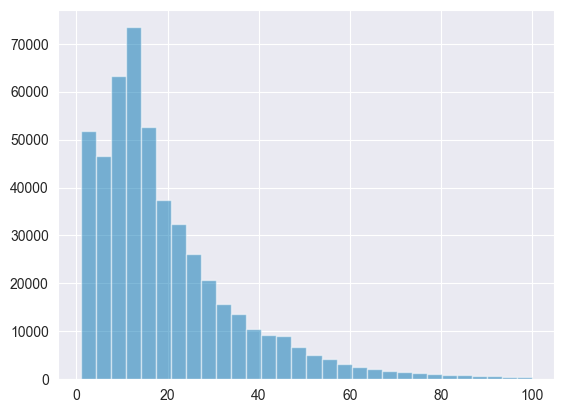

In [35]:
plt.hist(df[df['stem_diameter_cm'] < 100]['stem_diameter_cm'], bins=30, color=current_colors[0], alpha=0.5)

(array([1.579e+03, 6.040e+02, 2.370e+02, 1.200e+02, 6.700e+01, 6.900e+01,
        4.600e+01, 2.400e+01, 3.100e+01, 2.000e+01, 1.300e+01, 1.100e+01,
        1.200e+01, 1.200e+01, 3.000e+00, 5.000e+00, 5.000e+00, 7.000e+00,
        9.000e+00, 9.000e+00, 4.000e+00, 8.000e+00, 4.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([100.1 , 122.43, 144.76, 167.09, 189.42, 211.75, 234.08, 256.41,
        278.74, 301.07, 323.4 , 345.73, 368.06, 390.39, 412.72, 435.05,
        457.38, 479.71, 502.04, 524.37, 546.7 , 569.03, 591.36, 613.69,
        636.02, 658.35, 680.68, 703.01, 725.34, 747.67, 770.  ]),
 <BarContainer object of 30 artists>)

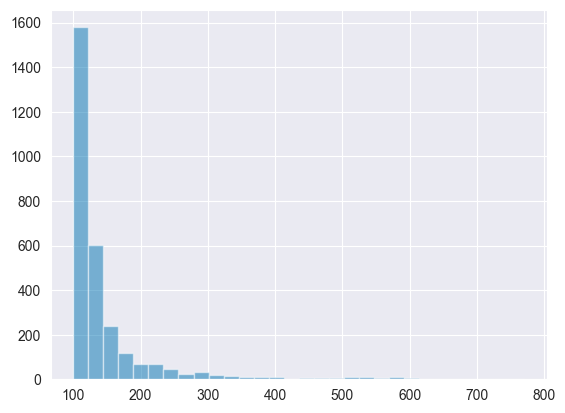

In [36]:
plt.hist(df[df['stem_diameter_cm'] > 100]['stem_diameter_cm'], bins=30, color=current_colors[0], alpha=0.5)

Récupérer les 10 espèces (species) les plus grandes en moyenne.
Afficher le résultat dans un barplot.

In [37]:
df.sort_values(by='height_m', ascending=False).head(10)

,tree_id,division,family,genus,species,latitude,longitude,stem_diameter_cm,height_m,crown_radius_m,height_outlier,crown_radius_outlier,reference_id
453218,T_453219,Gymnosperm,Cupressaceae,Sequoia,Sequoia sempervirens,41.205,-124.016,483.0,115.8,NaN,N,N,64
87624,T_87625,Gymnosperm,Cupressaceae,Sequoia,Sequoia sempervirens,40.000,-123.800,598.0,112.9,NaN,N,N,17
87621,T_87622,Gymnosperm,Cupressaceae,Sequoia,Sequoia sempervirens,40.000,-123.800,360.0,112.5,NaN,N,N,17
87623,T_87624,Gymnosperm,Cupressaceae,Sequoia,Sequoia sempervirens,40.000,-123.800,474.0,111.6,NaN,N,N,17
87622,T_87623,Gymnosperm,Cupressaceae,Sequoia,Sequoia sempervirens,40.000,-123.800,414.0,110.0,NaN,N,N,17
87620,T_87621,Gymnosperm,Cupressaceae,Sequoia,Sequoia sempervirens,40.000,-123.800,320.0,108.5,NaN,N,N,17
481205,T_481206,NaN,NaN,NaN,NaN,31.198,-84.469,13.6,102.7,NaN,Y,N,65
87625,T_87626,Gymnosperm,Cupressaceae,Sequoia,Sequoia sempervirens,40.000,-123.800,648.0,102.5,NaN,N,N,17
354642,T_354643,Angiosperm,Dipterocarpaceae,Shorea,Shorea faguetiana,4.917,117.667,212.0,100.8,20.0,N,N,51
453217,T_453218,Angiosperm,Myrtaceae,Eucalyptus,Eucalyptus regnans,-43.077,146.769,405.0,99.7,NaN,N,N,64


Pour chaque arbre, vous avez ses coordonnées (avec latitude et longitude). Utilisez la fonction scatter pour les afficher dans le plan.
Ajustez la taille des points pour que l’affichage soit plus lisible.
(On devrait quasiment voir la carte du monde)

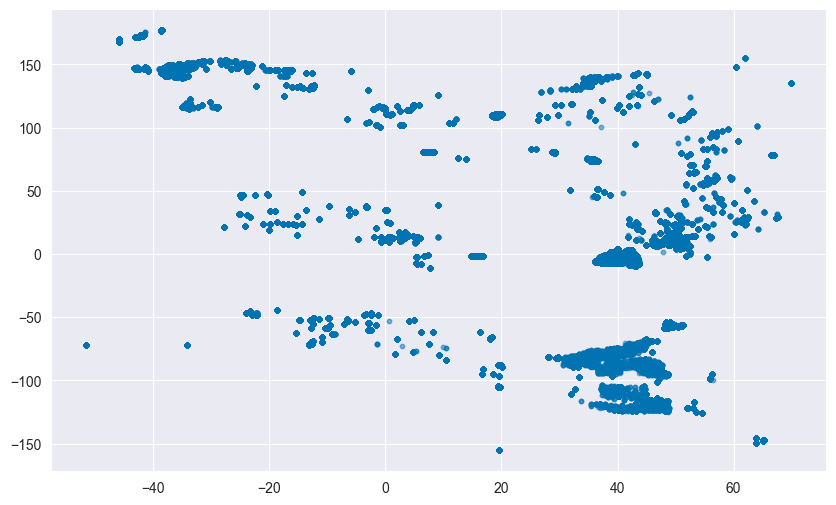

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df["latitude"], df["longitude"], s=10, alpha=0.5)

Bonus : Utilisez l’exemple que l’on a vu en CM pour afficher la carte du monde avec ces mêmes points.
Vous pouvez vous amuser à grouper les points et afficher des densités empiriques.

(Utilisez Basemap avec une projection "cyl", et les options llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
https://matplotlib.org/basemap/stable/users/cyl.html

In [39]:
from mpl_toolkits.basemap import Basemap

Text(0.5, 1.0, 'Coordonnées des arbres sur la carte du monde')

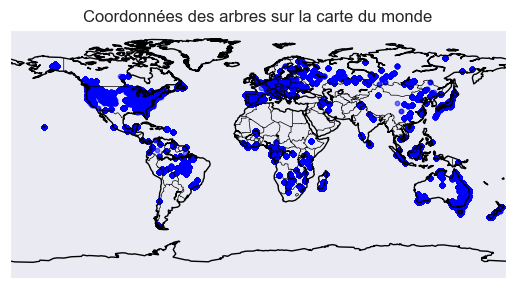

In [40]:
# Créer une carte Basemap avec une projection cylindrique
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

# Dessiner les côtes et les frontières
m.drawcoastlines()
m.drawcountries()

# Convertir les coordonnées latitude et longitude en coordonnées x et y
x, y = m(df["longitude"].values, df["latitude"].values)

# Tracer les points sur la carte
m.scatter(x, y, s=10, alpha=0.5, color='blue')

# Ajouter un titre
plt.title('Coordonnées des arbres sur la carte du monde')